# **Author : Devarsh Patel**

# Task 1 : Prediction using Supervised Machine Learning

**GRIP @ The Sparks Foundation**

To predict percentage of marks that student expected to score based on no. of hours of studying

We would use linear regression where independent variable is no. of hours and dependent variable is score.

Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Getting data

In [4]:
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

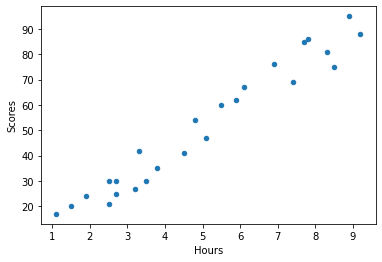

In [5]:
df.plot.scatter('Hours','Scores')

We see there is linear relationship between hours of study and score obtained.

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Correlation score is 0.976

# Regression model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [24]:
def regression(model, X, y, split):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=split,
                                                        random_state=0)

    print('Training features shape :', X_train.shape)
    print('Testing features shape : ', X_test.shape)
    print('Training output shape : ', y_train.shape)
    print('Testing output shape : ', y_test.shape)
    print()

    model.fit(X_train, y_train)

    a = model.coef_[0]
    b = model.intercept_

    print("Slope of fitted line :", a)
    print("Intercept of fitted line :", b)
    print()

    y_pred = model.predict(X_train)

    print("RMSE of fit on training data:",
          np.sqrt(mean_squared_error(y_train, y_pred)))
    print("R^2 score of fit on training data :", r2_score(y_train, y_pred))
    print()

    y_pred = model.predict(X_test)

    print("RMSE of fit on test data:",
          np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R^2 score of fit on test data :", r2_score(y_test, y_pred))

    plt.scatter(X_train, y_train, c='blue')
    plt.scatter(X_test, y_test, c='red')
    plt.legend(['Train', 'Test'])
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    x1, x2 = plt.xlim()

    x = np.linspace(x1, x2, 100)
    y = a * x + b

    plt.plot(x, y)

    return model

Training features shape : (18, 1)
Testing features shape :  (7, 1)
Training output shape :  (18,)
Testing output shape :  (7,)

Slope of fitted line : 9.941678339488096
Intercept of fitted line : 1.932204253151646

RMSE of fit on training data: 5.7052937757405875
R^2 score of fit on training data : 0.9484509249326872

RMSE of fit on test data: 4.5092043283688055
R^2 score of fit on test data : 0.9367661043365055


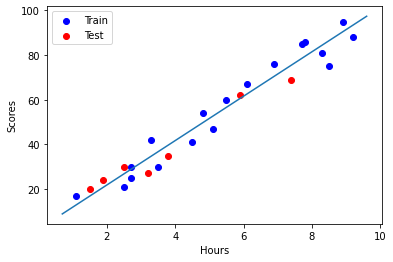

In [25]:
model = regression(LinearRegression(), X, y, 0.25)

In [26]:
input_hour = 9.25
predicted_score = model.predict(np.array(input_hour).reshape(-1, 1))[0]

print('Predicted score for a student studying %.2f hours : %.2f' %
      (input_hour, predicted_score))

Predicted score for a student studying 9.25 hours : 93.89


With $R^2$ score of 0.937 and RMSE of 4.509 on testing data, we can conclude our model fits data well. As there is just simple regression, there is no room of improvement by using regularization like lasso, ridge or elastic-net. If you want to experiment using different models, pass model into ```regression``` function.

# Thank you